# Parte 1 Infraestrutura

In [1]:
# python version
!python --version

Python 3.10.13


In [2]:
# virtualenv
!which python

/Users/bakudas/code/pos-infnet-clusterizacao/pos-pd-clusterizacao/bin/python


In [3]:
# install libs
!pip install scikit-learn scikit-learn-extra pandas matplotlib seaborn scipy numpy &> /dev/null

In [4]:
# generate requirements file
!pip freeze > requirements.txt

In [5]:
# check requirements file
!cat requirements.txt

appnope==0.1.4
asttokens==2.4.1
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.8
decorator==5.1.1
exceptiongroup==1.2.2
executing==2.1.0
fonttools==4.55.0
ipykernel==6.29.5
ipython==8.29.0
jedi==0.19.2
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.7
matplotlib==3.9.2
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==2.1.3
packaging==24.2
pandas==2.2.3
parso==0.8.4
pexpect==4.9.0
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
psutil==6.1.0
ptyprocess==0.7.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pytz==2024.2
pyzmq==26.2.0
scikit-learn==1.5.2
scikit-learn-extra==0.3.0
scipy==1.14.1
seaborn==0.13.2
six==1.16.0
stack-data==0.6.3
threadpoolctl==3.5.0
tornado==6.4.1
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2024.2
wcwidth==0.2.13


## Jupyter notebook rodando
![jupyter rodando](./images/jupyter_env.png)

# Parte 2 Escolha de base de dados

Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
Quantos países existem no dataset?
Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
Realize o pré-processamento adequado dos dados.

In [6]:
import pandas as pd

# import and read database
df = pd.read_csv("data/Country-data.csv")

In [7]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
colunas = ["pais", "mortalidade_infantil", "exportacoes", "saude", "importacoes", "renda_per_capita", "inflacao", "expectativa_vida", "fertilidade_total", "pib_per_capita"]

In [9]:
df.columns = colunas

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  167 non-null    object 
 1   mortalidade_infantil  167 non-null    float64
 2   exportacoes           167 non-null    float64
 3   saude                 167 non-null    float64
 4   importacoes           167 non-null    float64
 5   renda_per_capita      167 non-null    int64  
 6   inflacao              167 non-null    float64
 7   expectativa_vida      167 non-null    float64
 8   fertilidade_total     167 non-null    float64
 9   pib_per_capita        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
df.describe()

,mortalidade_infantil,exportacoes,saude,importacoes,renda_per_capita,inflacao,expectativa_vida,fertilidade_total,pib_per_capita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
# check nulls
df.isnull().sum()

pais                    0
mortalidade_infantil    0
exportacoes             0
saude                   0
importacoes             0
renda_per_capita        0
inflacao                0
expectativa_vida        0
fertilidade_total       0
pib_per_capita          0
dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler

df_numerical = df.drop(columns=['pais'])
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

In [14]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])

In [15]:
df_scaled

,mortalidade_infantil,exportacoes,saude,importacoes,renda_per_capita,inflacao,expectativa_vida,fertilidade_total,pib_per_capita
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [16]:
num_paises = df['pais'].nunique()
print(f"Número de países: {num_paises}")

Número de países: 167


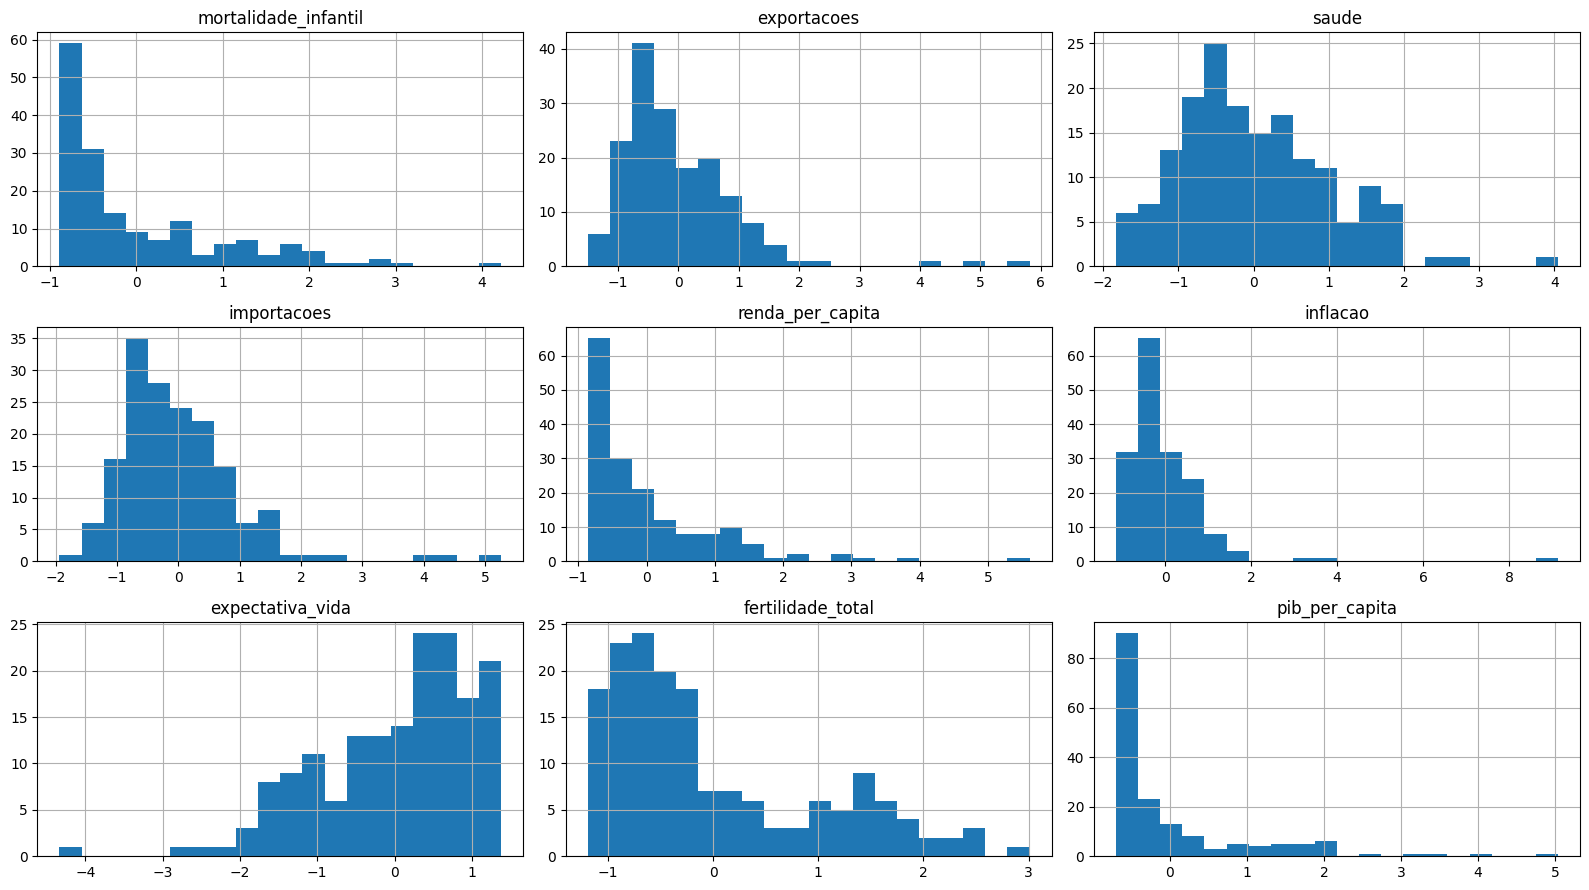

In [27]:
import matplotlib.pyplot as plt

# Plotando histogramas para cada variável
df_scaled.hist(figsize=(16, 9), bins=20)
plt.tight_layout()
plt.show()

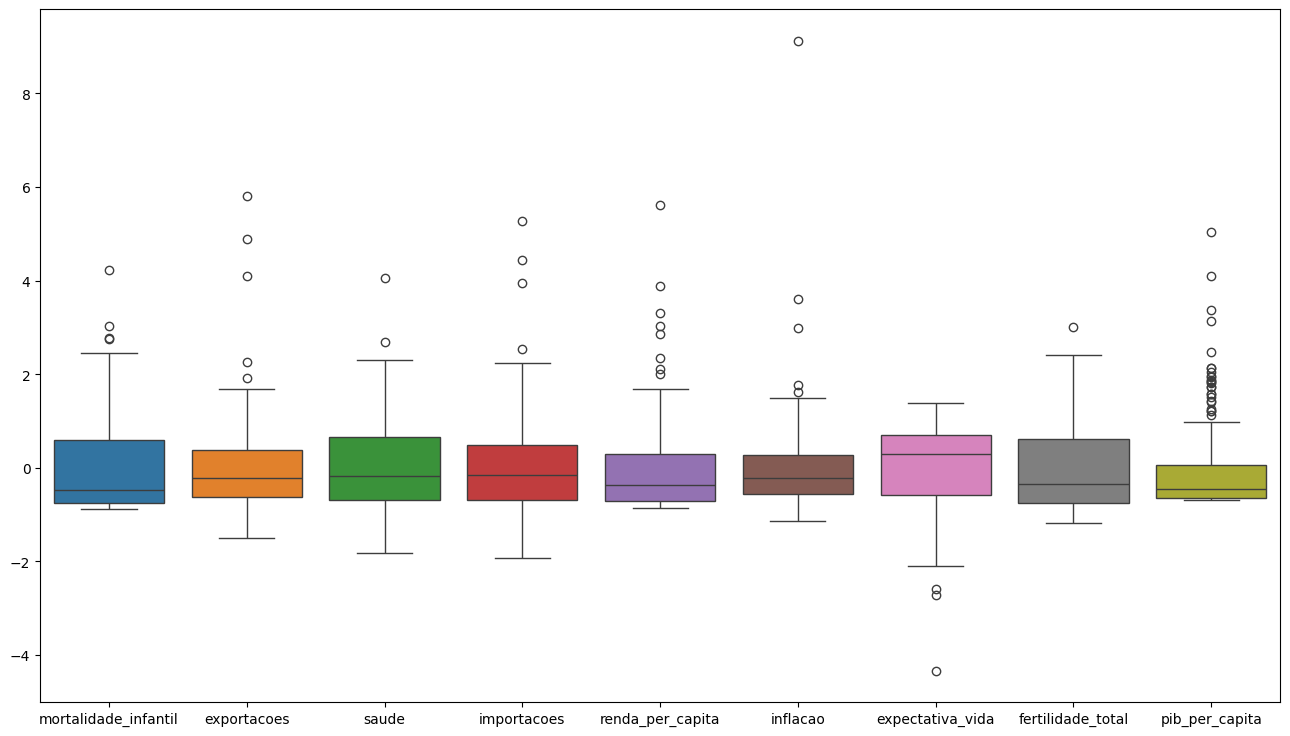

In [32]:
import seaborn as sns

plt.figure(figsize=(16, 9))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=0)
plt.show()

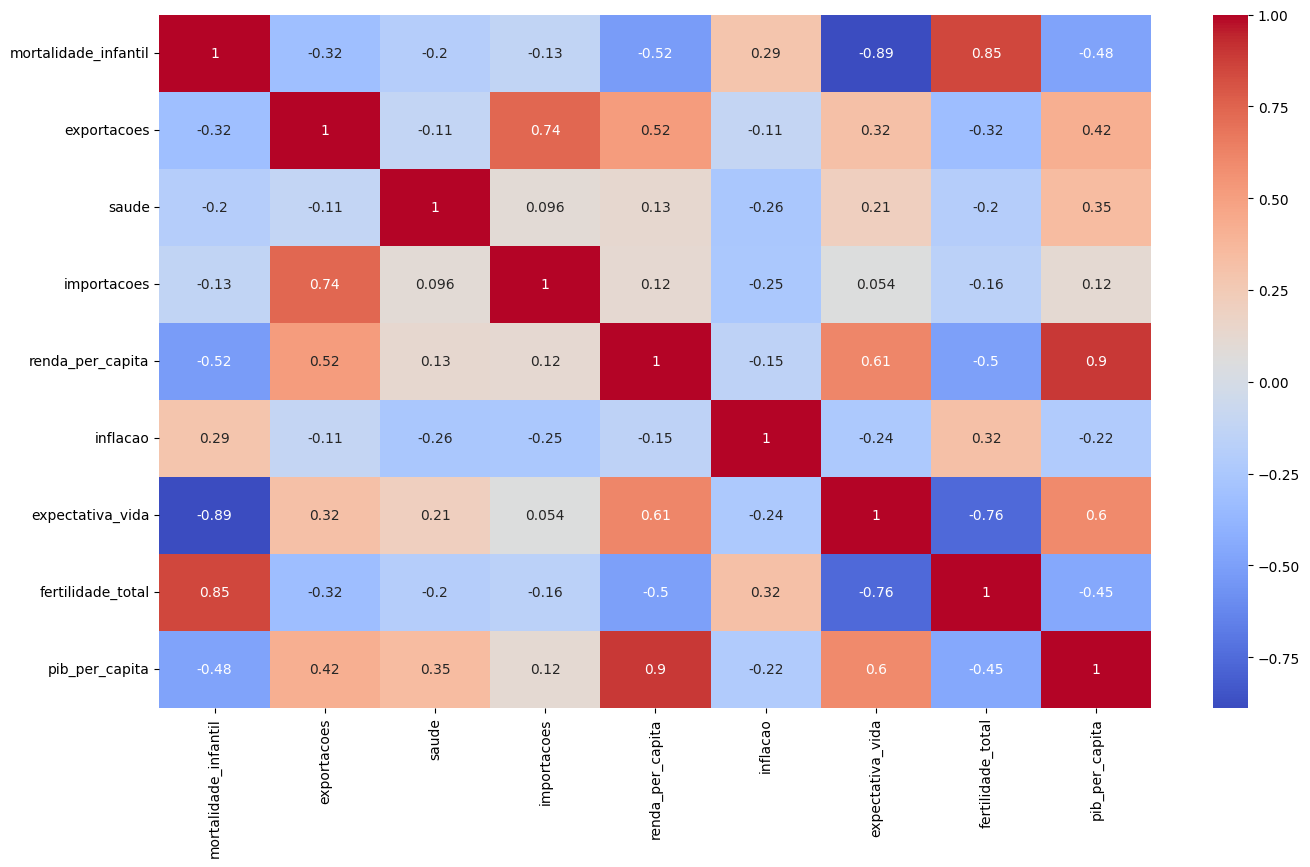

In [24]:
corr_matrix = df_scaled.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

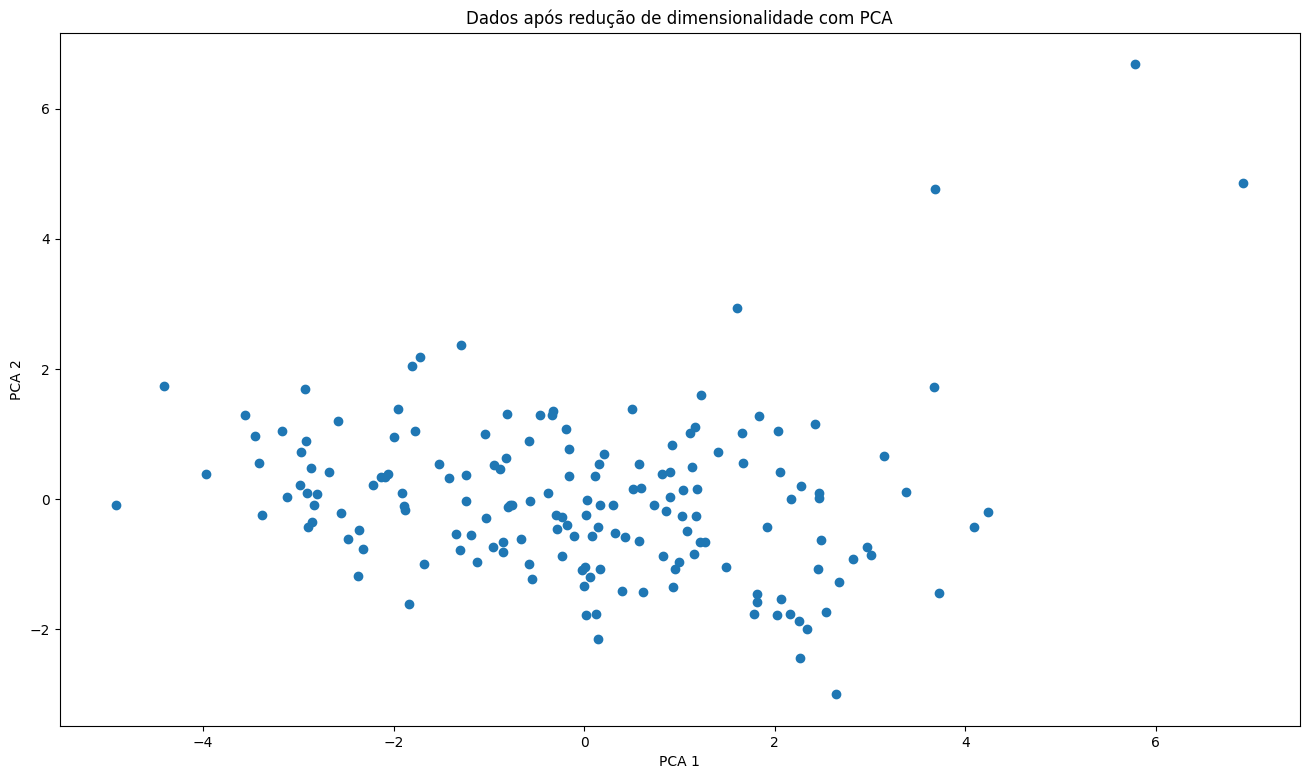

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(16, 9))
plt.scatter(df_pca[:, 0], df_pca[:, 1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Dados após redução de dimensionalidade com PCA')
plt.show()

In [33]:
from sklearn.cluster import KMeans
import numpy as np


In [69]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)


KMeans(n_clusters=3, random_state=42)

In [70]:
df['cluster_kmeans'] = kmeans.labels_

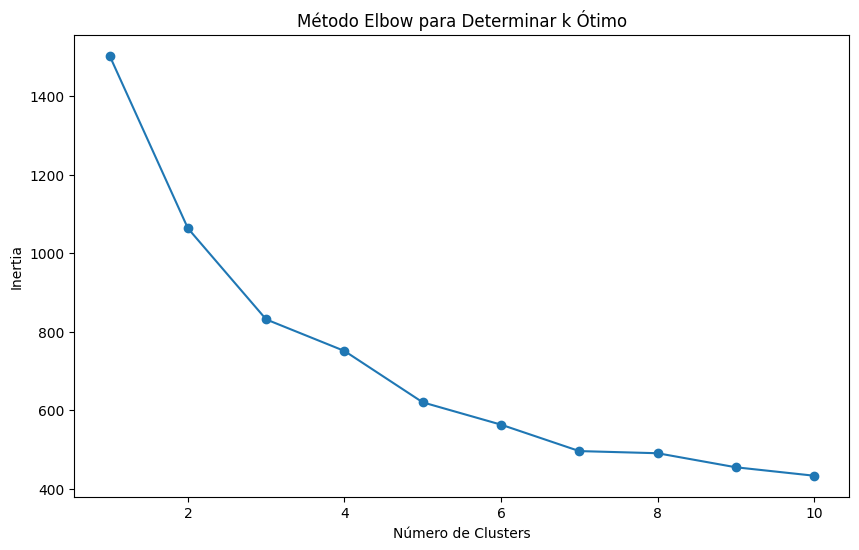

In [66]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método Elbow para Determinar k Ótimo')
plt.show()


In [71]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df_scaled)
representative_countries = df.iloc[closest]['pais']
print("Países mais representativos de cada cluster:")
print(representative_countries)


Países mais representativos de cada cluster:
143    Suriname
68      Iceland
63       Guinea
Name: pais, dtype: object


In [72]:
# Supondo que df_scaled é um DataFrame pandas com os dados normalizados

# Definir o número de clusters desejado (n_clusters)
k = 3  # Por exemplo, queremos 3 clusters

# Aplicando o K-Médias
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_scaled)

# Obter os rótulos dos clusters (opcional)
labels = kmeans.labels_

# Obter os centróides dos clusters
centroids = kmeans.cluster_centers_

# Criando um DataFrame para visualizar os centróides
centroids_df = pd.DataFrame(centroids, columns=df_scaled.columns)
print("Coordenadas dos centróides dos clusters:")
print(centroids_df)


Coordenadas dos centróides dos clusters:
   mortalidade_infantil  exportacoes     saude  importacoes  renda_per_capita  \
0             -0.393282    -0.030584 -0.206179     0.019562         -0.250930   
1             -0.827449     0.645080  0.727411     0.190639          1.484243   
2              1.413564    -0.457615 -0.187898    -0.189897         -0.707839   

   inflacao  expectativa_vida  fertilidade_total  pib_per_capita  
0 -0.005783          0.226762          -0.402579       -0.355832  
1 -0.484921          1.079579          -0.791877        1.615995  
2  0.398989         -1.297031           1.402874       -0.612761  


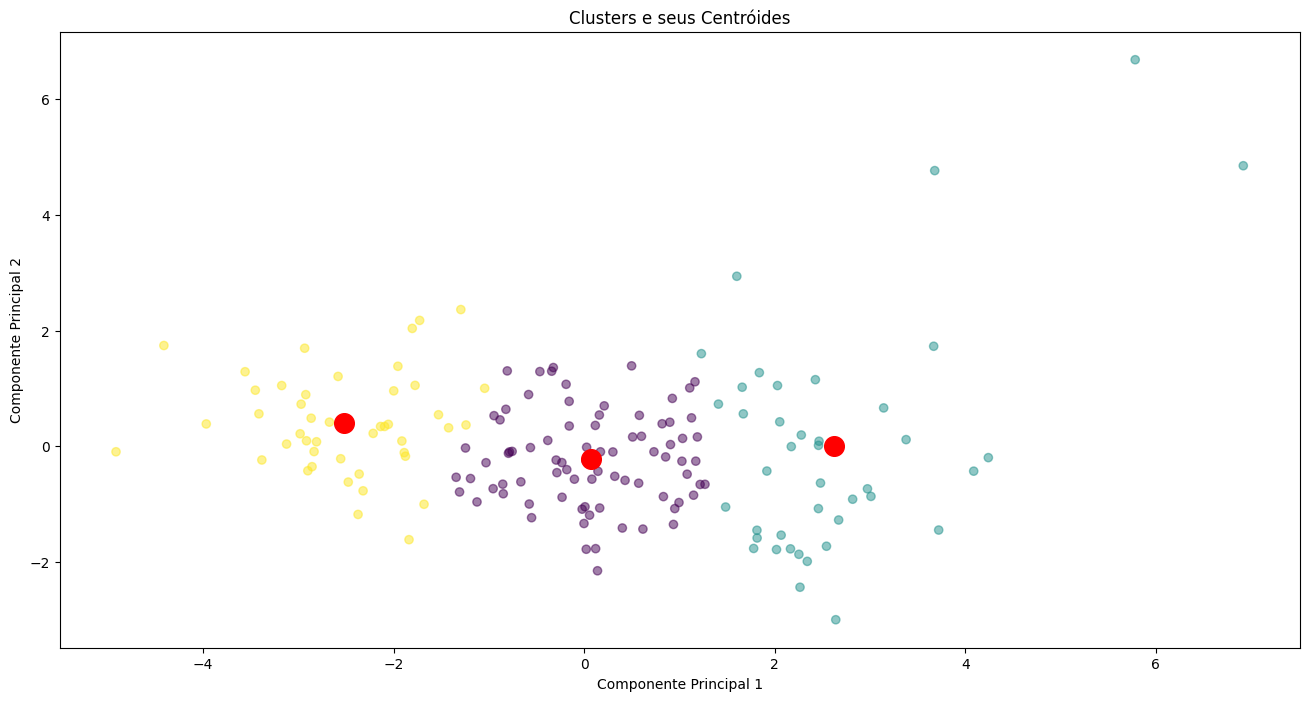

In [74]:
# Aplicar novamente o K-Médias para os dados reduzidos
kmeans.fit(df_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotando os clusters e os centróides
plt.figure(figsize=(16, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='o')  # Plotando os centróides
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters e seus Centróides')
plt.show()


In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage


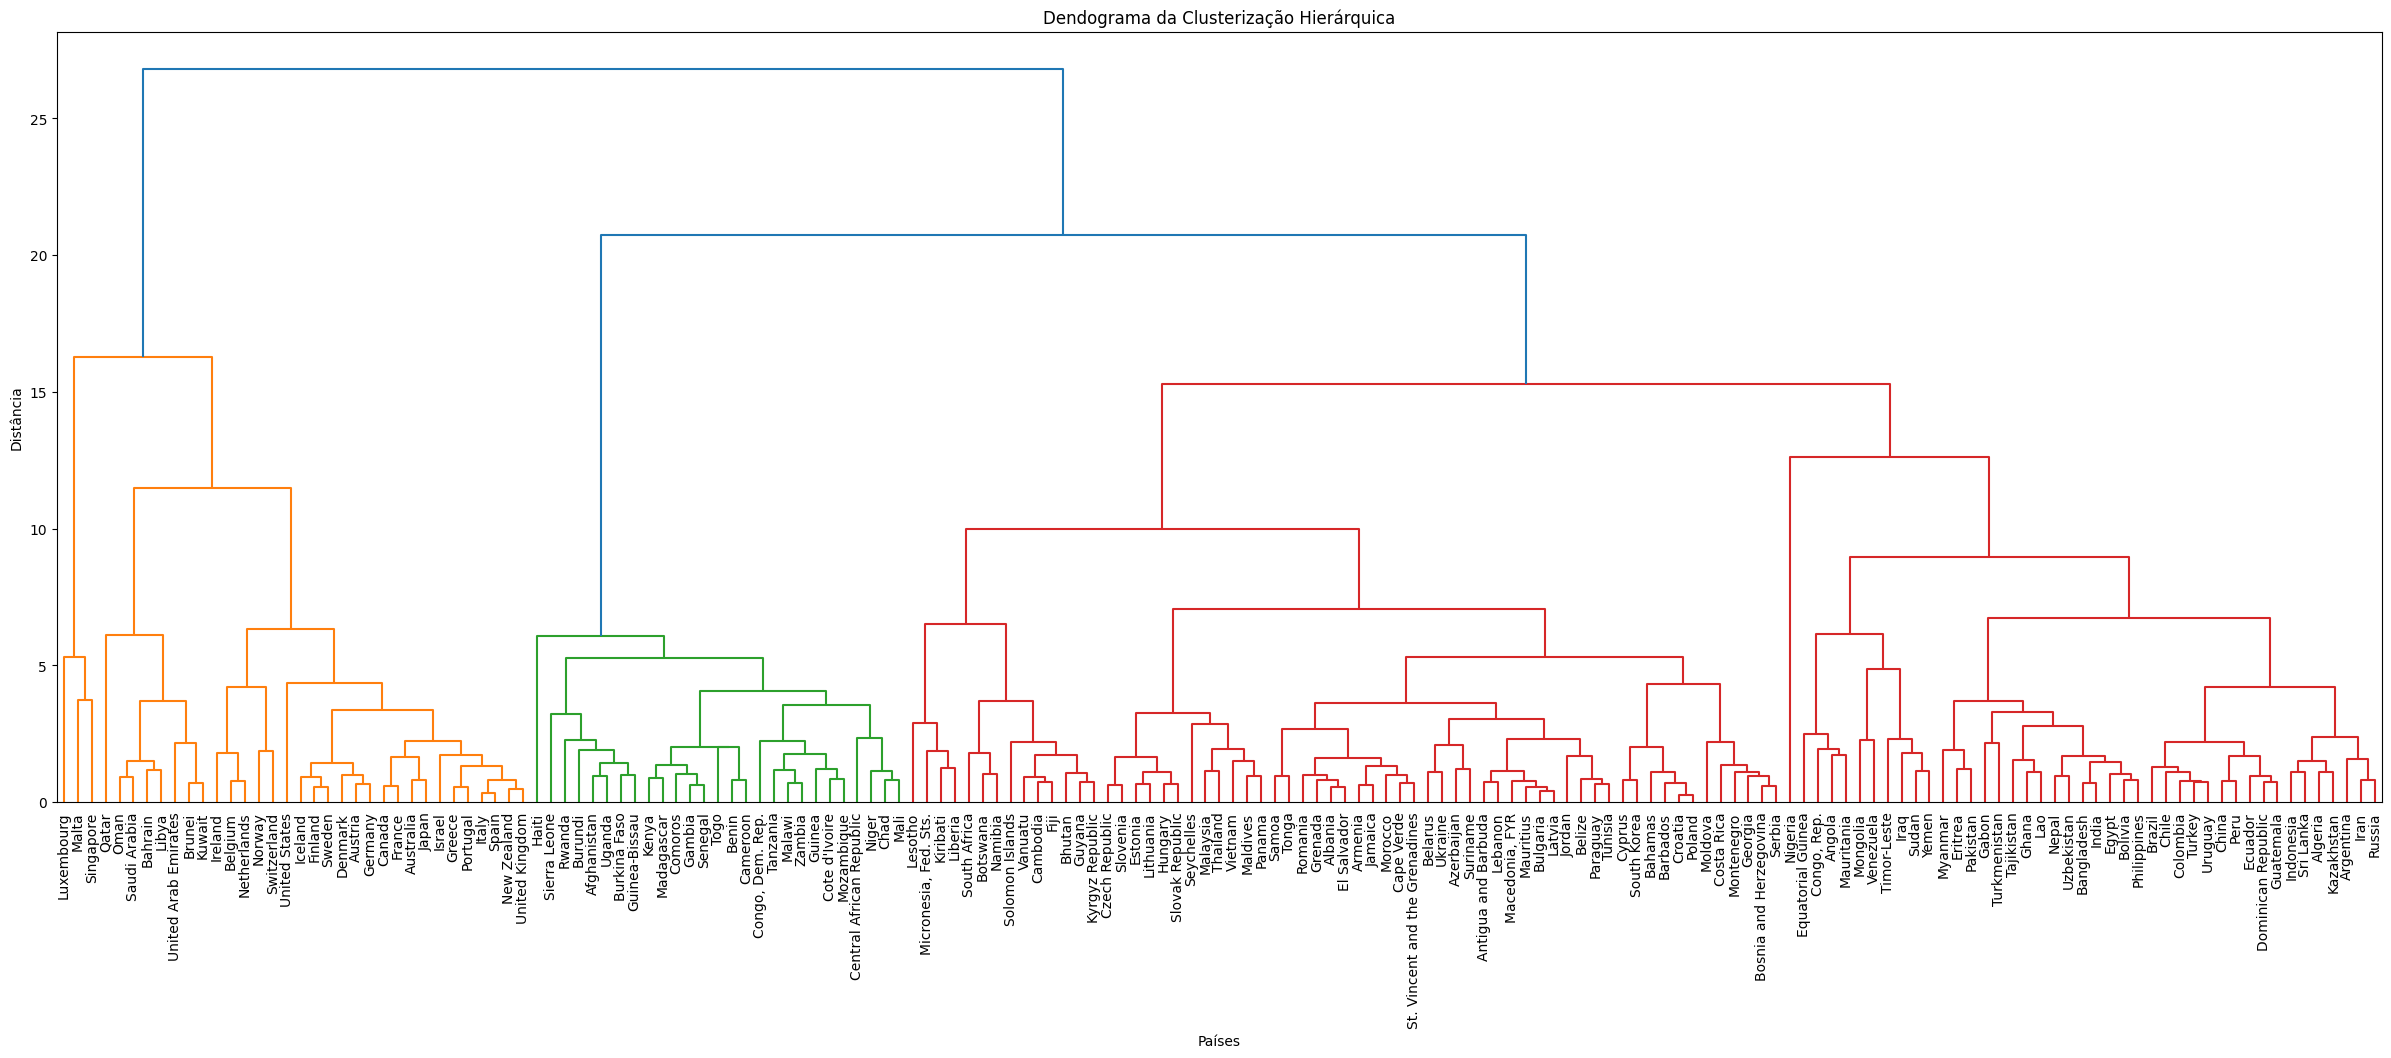

In [82]:
Z = linkage(df_scaled, method='ward')
plt.figure(figsize=(30, 10))
dendrogram(Z, labels=df['pais'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendograma da Clusterização Hierárquica')
plt.xlabel('Países')
plt.ylabel('Distância')
plt.show()


In [53]:
from scipy.cluster.hierarchy import fcluster

clusters_hierarchical = fcluster(Z, 3, criterion='maxclust')
df['cluster_hierarchical'] = clusters_hierarchical


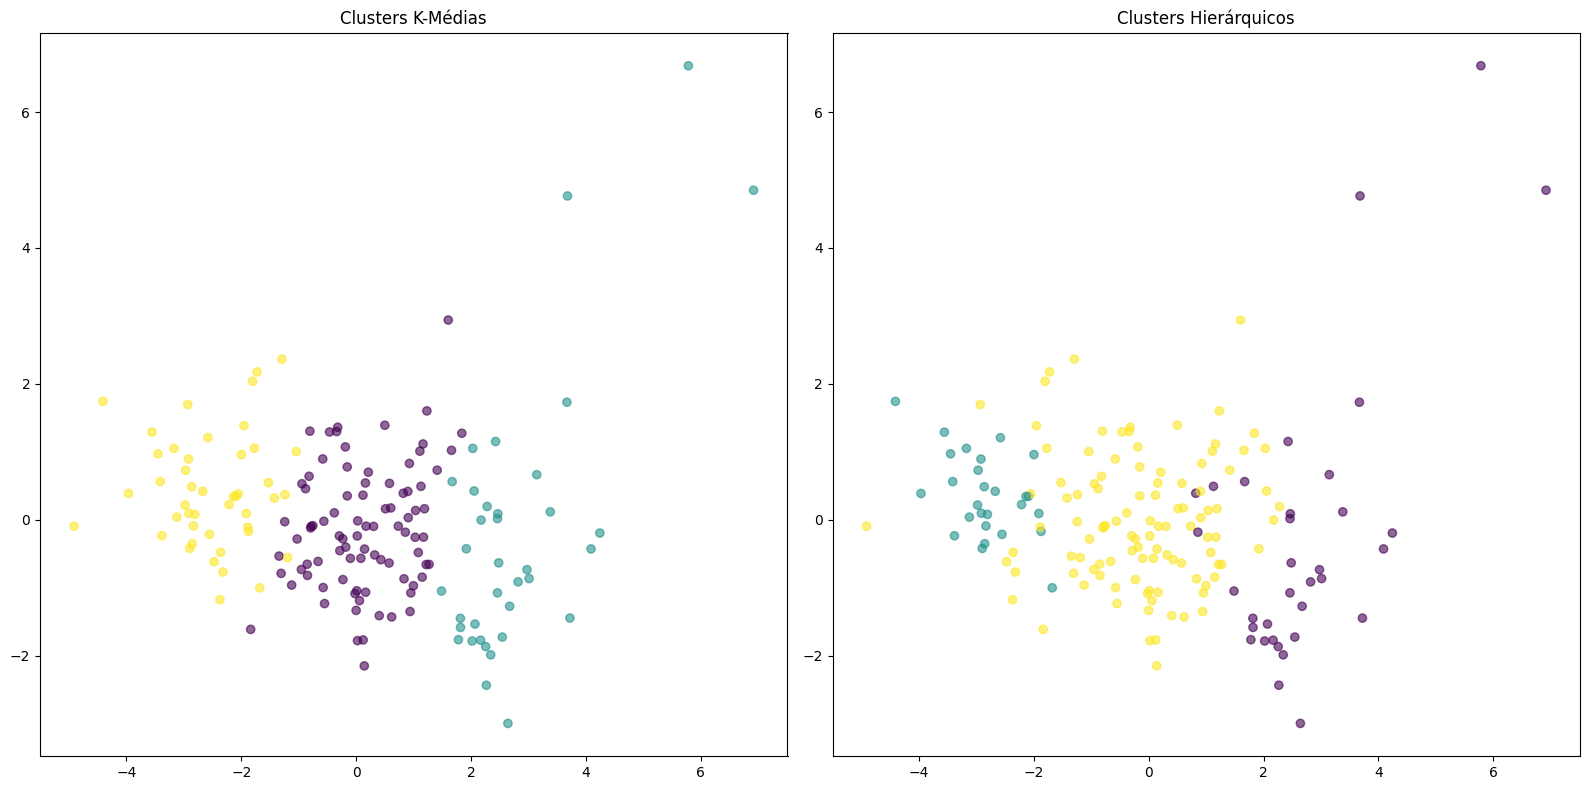

In [63]:
plt.figure(figsize=(16, 8))

# K-Médias
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster_kmeans'], cmap='viridis', alpha=0.6)
plt.title('Clusters K-Médias')

# Clusterização Hierárquica
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster_hierarchical'], cmap='viridis', alpha=0.6)
plt.title('Clusters Hierárquicos')

plt.tight_layout()
plt.show()
